<a href="https://colab.research.google.com/github/Sambhaji6529/Company_EDA-Project/blob/main/Company_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # linear algebra
import numpy as np
import seaborn as sns
import os, sys
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot') # using for plot background 
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/companies.csv")
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [ ]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [ ]:
df.tail()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01
66367,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,14851,operating,NaN,NaN,NaN,NaN,1,NaN,2013-10-01,2013-10-01


In [ ]:
df.dtypes #Kind of data each column consists

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object

In [ ]:
df.describe(include='all')

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
count,66368,66367,61310,63220,66368,66368,59410,57821,58338,58340,66368.000000,51147,66344,66368
unique,66368,66102,61191,27296,18896,4,137,311,1092,5111,NaN,3978,4817,4518
top,/organization/-fame,Blink,http://www.askforoffer.com,Software,-,operating,USA,CA,SF Bay Area,San Francisco,NaN,2012-01-01,2014-01-01,2014-01-01
freq,1,4,5,3995,12785,53034,37601,12900,8804,3526,NaN,2730,565,483
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.732522,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.360251,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


In [ ]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

In [ ]:
df.shape  #number of rows and columns in dataset

(66368, 14)

#**Checking for missing values :**

In [ ]:
df.isnull().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

In [ ]:
df['name'].value_counts()

Blink                                         4
Peach                                         4
Spire                                         4
Roost                                         4
Karma                                         4
                                             ..
Game Time Giving, Inc                         1
Game Time Tickets                             1
Game Trading technologies, Inc.               1
Game Trust                                    1
İnovatiff Reklam ve Tanıtım Hizmetleri Tic    1
Name: name, Length: 66102, dtype: int64

In [ ]:
#how many top 10 company name  in world
df['name'].value_counts()[0:10]

Blink        4
Peach        4
Spire        4
Roost        4
Karma        4
Dash         3
Hopscotch    3
Chime        3
Helpr        3
Gather       3
Name: name, dtype: int64

In [ ]:
#only name print
list(df['name'].value_counts()[0:10].keys())

['Blink',
 'Peach',
 'Spire',
 'Roost',
 'Karma',
 'Dash',
 'Hopscotch',
 'Chime',
 'Helpr',
 'Gather']

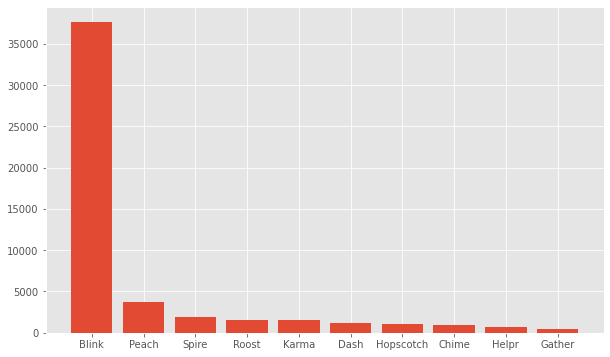

In [ ]:
#plot the bar
plt.figure(figsize=(10,6))
plt.bar(list(df['name'].value_counts()[:10].keys()),list(df['country_code'].value_counts()[:10]))
plt.show()

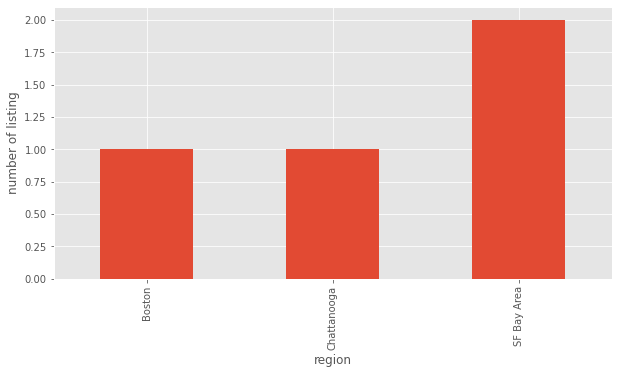

In [ ]:
#Find spire name company which area in present 
plt.figure(figsize=(10,5))
df1=df[df['name']=='Spire']
host_listings=df1.groupby(['region'])['name'].count()
host_listings.plot(kind='bar')
plt.xlabel(xlabel='region')
plt.ylabel(ylabel='number of listing')
plt.show()

In [ ]:
df.region.unique()

array(['Mumbai', 'DE - Other', nan, ..., 'Gardanne', 'Cancun', 'Muenchen'],
      dtype=object)

In [ ]:
len(df.region.unique())

1093

In [ ]:
df['region'].value_counts()

SF Bay Area         8804
New York City       3528
Boston              2378
London              2345
Los Angeles         1877
                    ... 
Sophia Antipolis       1
MOZ - Other            1
Kolbermoor             1
UGA - Other            1
Muenchen               1
Name: region, Length: 1092, dtype: int64

In [ ]:
data=df.region.value_counts()[:10]
data

SF Bay Area         8804
New York City       3528
Boston              2378
London              2345
Los Angeles         1877
Seattle             1207
Washington, D.C.    1035
Chicago              980
San Diego            899
Denver               831
Name: region, dtype: int64

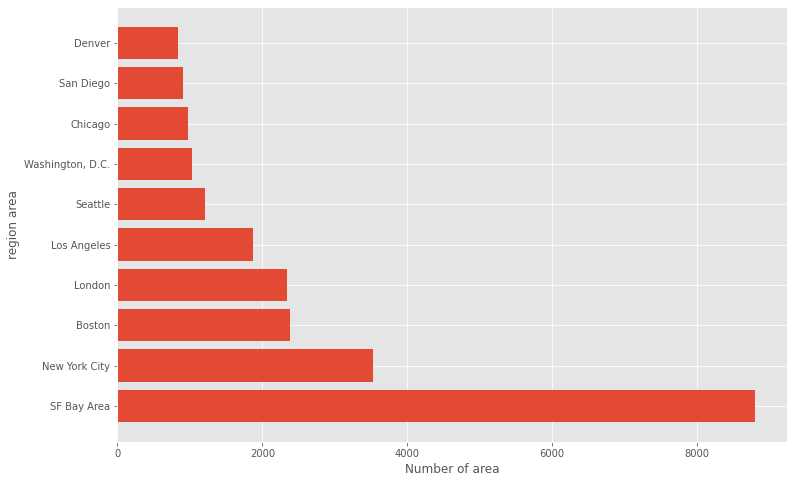

In [ ]:
data=df.region.value_counts()[:10]
plt.figure(figsize=(12,8))
x=list(data.index)
y=list(data.values)
plt.xlabel("Number of area")
plt.ylabel("region area")
plt.barh(x,y)
plt.show()

In [ ]:
df['region'].value_counts('New York City')

SF Bay Area         0.150914
New York City       0.060475
Boston              0.040762
London              0.040197
Los Angeles         0.032175
                      ...   
Sophia Antipolis    0.000017
MOZ - Other         0.000017
Kolbermoor          0.000017
UGA - Other         0.000017
Muenchen            0.000017
Name: region, Length: 1092, dtype: float64

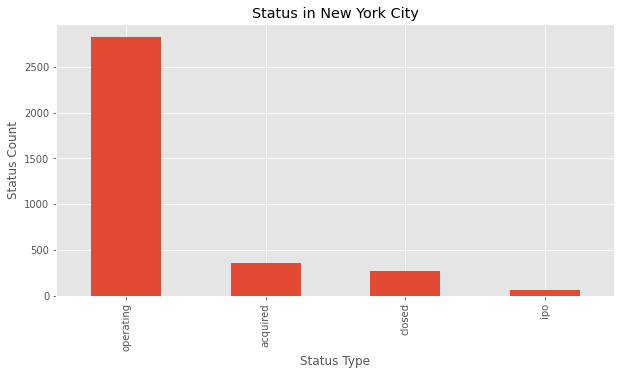

In [ ]:
#how many company are operating,acquired
df1=df[df['region']=='New York City']
listings1=df1['status'].value_counts()
plt.figure(figsize=(10,5))
listings1.plot(kind="bar")
plt.title(label="Status in New York City")
plt.xlabel(xlabel="Status Type")
plt.ylabel(ylabel="Status Count")
plt.show()

In [ ]:
df['funding_total_usd'].value_counts()

-           12785
1000000      1147
100000        983
500000        979
2000000       820
            ...  
41370920        1
10548260        1
146071          1
1917766         1
14851           1
Name: funding_total_usd, Length: 18896, dtype: int64

In [ ]:
df.nunique() # check unique values

permalink            66368
name                 66102
homepage_url         61191
category_list        27296
funding_total_usd    18896
status                   4
country_code           137
state_code             311
region                1092
city                  5111
funding_rounds          19
founded_at            3978
first_funding_at      4817
last_funding_at       4518
dtype: int64

In [ ]:
#how many compay are open and closed
df['status'].value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

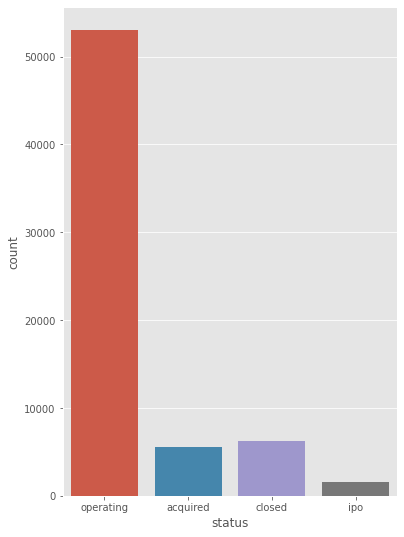

In [ ]:
plt.figure(figsize=(6,9))
sns.countplot('status',data=df)
plt.show()

In [ ]:
#How many varaites of company 
df['category_list'].value_counts()

Software                                                                       3995
Biotechnology                                                                  3615
E-Commerce                                                                     1332
Mobile                                                                         1177
Clean Technology                                                               1133
                                                                               ... 
Consumer Internet|Marketplaces|Mobile|Mobile Payments|Transportation|Travel       1
Apps|Mobile|Private Social Networking                                             1
Cloud Computing|Enterprise Software|Infrastructure|PaaS|Social Media              1
Content|SaaS|Social Media Marketing|Software                                      1
Consumer Goods|E-Commerce|Internet                                                1
Name: category_list, Length: 27296, dtype: int64

In [ ]:
df_software=df.loc[df['category_list']=='Software']
df_software

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000,acquired,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
42,/organization/10x10-room,10X10 Room,http://10x10room.com,Software,77500,operating,USA,MA,Boston,Lexington,1,2010-01-01,2011-10-12,2011-10-12
59,/organization/1248,1248,http://1248.io/index.php/?page=index,Software,378812,operating,GBR,C3,London,Cambridge,1,2013-01-01,2014-03-18,2014-03-18
72,/organization/15five,15Five,http://15five.com,Software,3400000,operating,USA,CA,SF Bay Area,San Francisco,3,2011-05-01,2012-01-01,2014-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66307,/organization/zurrba-group,Zurrba,http://www.zurrba.com,Software,-,operating,USA,CA,SF Bay Area,Palo Alto,1,NaN,2014-01-15,2014-01-15
66311,/organization/zuse,Zuse,NaN,Software,-,operating,USA,NY,New York City,New York,1,NaN,2013-05-01,2013-05-01
66329,/organization/zwittle,Zwittle,http://zwittle.com,Software,190000,operating,USA,UT,Salt Lake City,Logan,1,2011-01-01,2012-04-19,2012-04-19
66340,/organization/zylun-staffing,Zylun Staffing,http://www.zylun.com,Software,666154,operating,USA,UT,Salt Lake City,Lehi,1,2010-01-01,2014-08-28,2014-08-28


In [ ]:
#To Check biotechnology
df_biotechnology=df.loc[df['category_list']=='Biotechnology']
df_biotechnology

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21
41,/organization/10x-technologies,10X Technologies,http://10xtechnologies.com,Biotechnology,3550000,operating,USA,CA,SF Bay Area,Oakland,2,2012-01-01,2012-11-07,2015-01-12
140,/organization/22nd-century-group,22nd Century Group,http://www.xxiicentury.com,Biotechnology,15034750,ipo,USA,NY,NY - Other,Clarence,6,1998-01-01,2010-12-28,2014-09-18
210,/organization/3-v-biosciences,3-V Biosciences,http://www.3vbio.com,Biotechnology,128477567,operating,USA,CA,SF Bay Area,Menlo Park,7,2007-03-01,2007-05-22,2015-03-17
247,/organization/3ci,3CI,http://www.3ci.bz.it/en-US/Products.html,Biotechnology,133620,operating,ITA,6,Bolzano,Bolzano,1,2008-01-01,2011-01-01,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66353,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,Biotechnology,25000000,operating,USA,MD,"Washington, D.C.",Gaithersburg,1,2008-01-01,2010-09-09,2010-09-09
66355,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,34275015,operating,USA,MO,MO - Other,Fremont,4,1998-01-01,2010-01-29,2014-03-26
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,15419877,closed,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15
66360,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,8500000,acquired,USA,WI,Milwaukee,Milwaukee,1,NaN,2004-12-16,2004-12-16


In [ ]:
#To check e-commerce company 
df_ecommerce=df.loc[df['category_list']=='E-Commerce']
df_ecommerce

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000,operating,CHL,12,Santiago,Las Condes,1,2012-01-01,2013-02-18,2013-02-18
17,/organization/10-20-media,10-20 Media,http://www.10-20media.com,E-Commerce,2050000,operating,USA,MD,Baltimore,Woodbine,4,2001-01-01,2009-06-18,2011-12-28
64,/organization/12society,12Society,http://www.12Society.com,E-Commerce,-,acquired,USA,CA,Los Angeles,West Hollywood,1,2012-01-01,2012-04-05,2012-04-05
66,/organization/139shop,139shop,http://www.139shop.com,E-Commerce,-,operating,CHN,NaN,NaN,NaN,1,NaN,2007-02-01,2007-02-01
104,/organization/1jiajie,1jiajie,http://www.1jiajie.com,E-Commerce,4163132,operating,CHN,22,Beijing,Beijing,2,NaN,2013-09-01,2014-09-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66303,/organization/zura,Zura!,http://www.zura.com.br,E-Commerce,-,operating,BRA,27,BRA - Other,Brasil,1,NaN,2008-01-01,2008-01-01
66315,/organization/zuujit,Zuujit,http://www.zuujit.com,E-Commerce,2700000,closed,USA,CA,Santa Barbara,Santa Barbara,1,2010-01-01,2010-04-30,2010-04-30
66320,/organization/zuzuche,ZuzuChe,http://www.zuzuche.com,E-Commerce,1515151,operating,CHN,30,Guangzhou,Guangzhou,1,2011-01-01,2011-01-01,2011-01-01
66339,/organization/zylie-the-bear,Zylie the Bear,http://zyliethebear.com,E-Commerce,75000,operating,USA,CT,Hartford,Greenwich,1,2009-01-01,2012-06-07,2012-06-07


In [ ]:
#which area or city in company 
df['region'].value_counts()

SF Bay Area         8804
New York City       3528
Boston              2378
London              2345
Los Angeles         1877
                    ... 
Sophia Antipolis       1
MOZ - Other            1
Kolbermoor             1
UGA - Other            1
Muenchen               1
Name: region, Length: 1092, dtype: int64

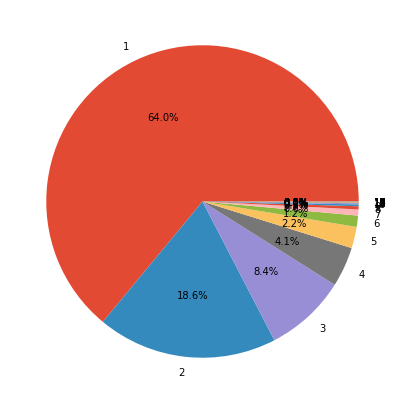

In [ ]:
#how many company are funding
plt.figure(figsize=(7,9))
plt.pie(list(df['funding_rounds'].value_counts()),labels=list(df['funding_rounds'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [ ]:
df['funding_rounds'].unique()

array([ 1,  2,  4,  3,  9,  5,  6,  7,  8, 10, 11, 12, 15, 13, 14, 17, 18,
       16, 19])

In [ ]:
df['funding_rounds'].value_counts()

1     42472
2     12353
3      5606
4      2739
5      1468
6       774
7       418
8       214
9       126
10       79
11       51
12       28
13       15
15        6
14        6
16        6
17        3
18        3
19        1
Name: funding_rounds, dtype: int64

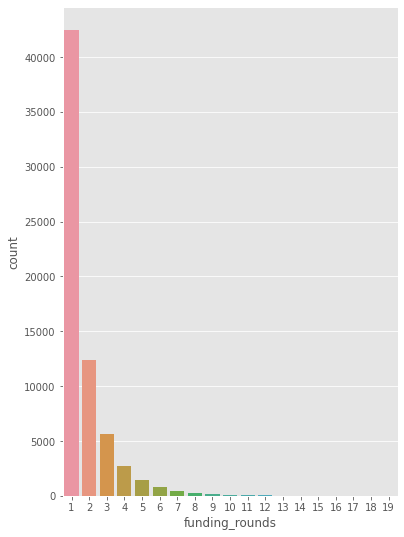

In [ ]:
plt.figure(figsize=(6,9))
sns.countplot('funding_rounds',data=df)
plt.show()

In [ ]:
df['founded_at']=pd.to_datetime(df['founded_at'],errors='coerce')

In [ ]:
df['day']=(df['founded_at']).dt.day
df['month']=(df['founded_at']).dt.month
df['year']=(df['founded_at']).dt.year

In [ ]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,day,month,year
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,NaN,NaN,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,4.0,9.0,2014.0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,1.0,1.0,2007.0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,1.0,1.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaT,2012-04-01,2012-04-01,NaN,NaN,NaN
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,13.0,5.0,2012.0
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,1.0,1.0,2011.0
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,1.0,1.0,2014.0


In [ ]:
df.dtypes

permalink                    object
name                         object
homepage_url                 object
category_list                object
funding_total_usd            object
status                       object
country_code                 object
state_code                   object
region                       object
city                         object
funding_rounds                int64
founded_at           datetime64[ns]
first_funding_at             object
last_funding_at              object
day                         float64
month                       float64
year                        float64
dtype: object

In [ ]:
df[df['day'].notnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,day,month,year
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,4.0,9.0,2014.0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,1.0,1.0,2007.0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,1.0,1.0,2010.0
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,1.0,1.0,1997.0
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,1.0,1.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66361,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,2686600,operating,AUT,3,Vienna,Gerasdorf Bei Wien,1,2007-01-01,2013-01-29,2013-01-29,1.0,1.0,2007.0
66362,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,1120000,operating,GBR,H9,London,London,3,2014-01-28,2014-03-24,2015-02-25,28.0,1.0,2014.0
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,13.0,5.0,2012.0
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,1.0,1.0,2011.0


In [ ]:
df[df['month'].notnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,day,month,year
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,4.0,9.0,2014.0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,1.0,1.0,2007.0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,1.0,1.0,2010.0
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,1.0,1.0,1997.0
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,1.0,1.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66361,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,2686600,operating,AUT,3,Vienna,Gerasdorf Bei Wien,1,2007-01-01,2013-01-29,2013-01-29,1.0,1.0,2007.0
66362,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,1120000,operating,GBR,H9,London,London,3,2014-01-28,2014-03-24,2015-02-25,28.0,1.0,2014.0
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,13.0,5.0,2012.0
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,1.0,1.0,2011.0


In [ ]:
df[df['year'].notnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,day,month,year
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,4.0,9.0,2014.0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,1.0,1.0,2007.0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,1.0,1.0,2010.0
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851,operating,CAN,BC,Vancouver,Vancouver,2,1997-01-01,2009-09-11,2009-12-21,1.0,1.0,1997.0
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09,1.0,1.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66361,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,2686600,operating,AUT,3,Vienna,Gerasdorf Bei Wien,1,2007-01-01,2013-01-29,2013-01-29,1.0,1.0,2007.0
66362,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,1120000,operating,GBR,H9,London,London,3,2014-01-28,2014-03-24,2015-02-25,28.0,1.0,2014.0
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,13.0,5.0,2012.0
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01,1.0,1.0,2011.0


In [ ]:
#To convert data type int to float
df=df.fillna(0)
df['day']=df['day'].astype(int)

In [ ]:
#To convert data type int to float
df=df.fillna(0)
df['month']=df['month'].astype(int)

In [ ]:
#To convert data type int to float
df=df.fillna(0)
df['year']=df['year'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66368 non-null  object
 2   homepage_url       66368 non-null  object
 3   category_list      66368 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       66368 non-null  object
 7   state_code         66368 non-null  object
 8   region             66368 non-null  object
 9   city               66368 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         66368 non-null  object
 12  first_funding_at   66368 non-null  object
 13  last_funding_at    66368 non-null  object
 14  day                66368 non-null  int64 
 15  month              66368 non-null  int64 
 16  year               66368 non-null  int64

In [ ]:
df.groupby('month')['funding_rounds'].sum()

month
0     20531
1     55684
2      3512
3      3999
4      3660
5      3694
6      3947
7      3360
8      3337
9      3471
10     3572
11     3410
12     2807
Name: funding_rounds, dtype: int64

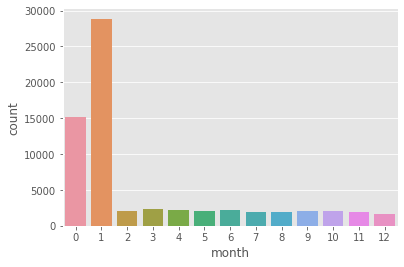

In [ ]:
sns.countplot(x='month',data=df)
plt.show()

In [ ]:
df.groupby('day')['funding_rounds'].sum()

day
0     20531
1     75910
2       728
3       636
4       725
5       754
6       539
7       660
8       567
9       573
10     1206
11      719
12      620
13      532
14      706
15     1597
16      508
17      566
18      623
19      451
20      784
21      500
22      463
23      471
24      427
25      482
26      399
27      400
28      470
29      459
30      537
31      441
Name: funding_rounds, dtype: int64

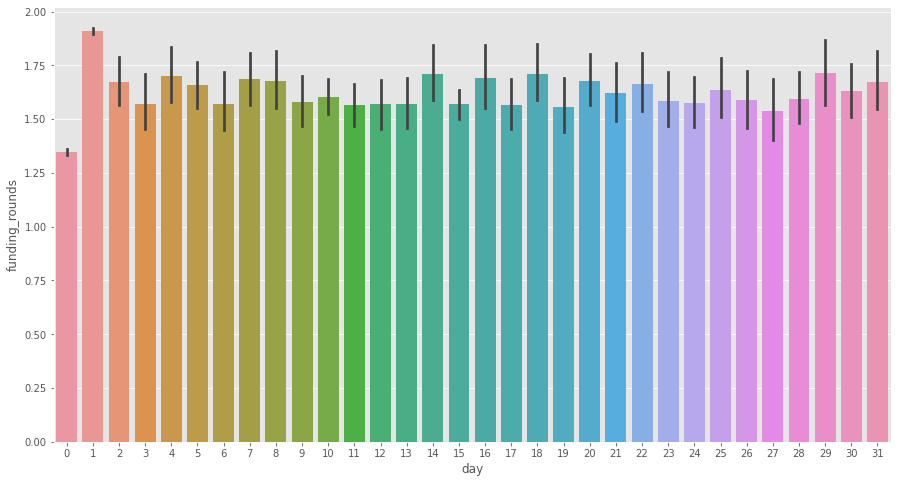

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x="day",y="funding_rounds",data=df)
plt.show()

In [ ]:
#dir(px.colors.qualitative)
#dir(px.colors.sequential)

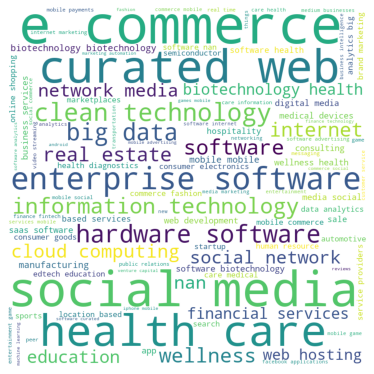

In [ ]:

# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"/content/drive/MyDrive/companies.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.category_list:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (6, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
     


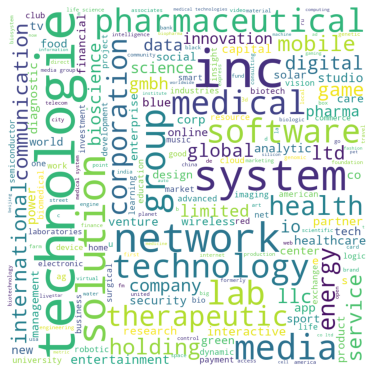

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"/content/drive/MyDrive/companies.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.name:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (6, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

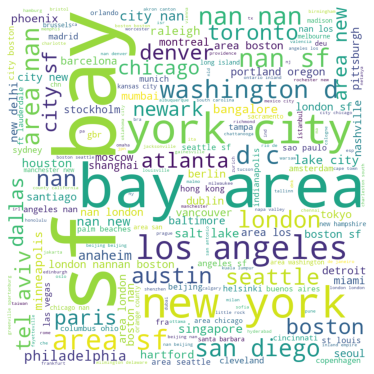

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"/content/drive/MyDrive/companies.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.region:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (6, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()